In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
new_saver = tf.train.import_meta_graph('./mymodel/vae.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./mymodel/'))

graph=tf.get_default_graph()

INFO:tensorflow:Restoring parameters from ./mymodel/vae


In [8]:
#getting Tensors
X=graph.get_tensor_by_name("input:0")                                    #for training and generating LT_VEC
Y=graph.get_tensor_by_name("gen_input:0")                                #for generating
output_train=graph.get_tensor_by_name("decoder/output/Relu:0")           #training_ouput
gen_output=graph.get_tensor_by_name("decoder/output/Relu_1:0")           #generated_output
Lt_vec=graph.get_tensor_by_name("Latent_vector/Latent_vector/BiasAdd:0") #Latent_vector
encoding_mean=graph.get_tensor_by_name("encoding/dense/BiasAdd:0")       #encoding_mean  
encoding_stddev=graph.get_tensor_by_name("encoding/dense_1/BiasAdd:0")   #encoding_stddev

In [9]:
#Generating_out
random=np.random.uniform(size=(1,784))
vec=sess.run(Lt_vec,feed_dict={X:random})
out=sess.run(gen_output,feed_dict={Y:vec})

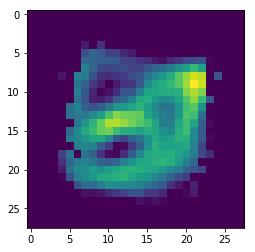

In [10]:
plt.imshow(out.reshape(28,28))